In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

# Логистическая регрессия

df = pd.read_csv('/content/b_depressed.csv')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey_id              1429 non-null   int64  
 1   Ville_id               1429 non-null   int64  
 2   sex                    1429 non-null   int64  
 3   Age                    1429 non-null   int64  
 4   Married                1429 non-null   int64  
 5   Number_children        1429 non-null   int64  
 6   education_level        1429 non-null   int64  
 7   total_members          1429 non-null   int64  
 8   gained_asset           1429 non-null   int64  
 9   durable_asset          1429 non-null   int64  
 10  save_asset             1429 non-null   int64  
 11  living_expenses        1429 non-null   int64  
 12  other_expenses         1429 non-null   int64  
 13  incoming_salary        1429 non-null   int64  
 14  incoming_own_farm      1429 non-null   int64  
 15  inco

In [ ]:
df.head()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


In [ ]:
df.tail()

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

In [ ]:
# убрать пропуски (в столбце no_lasting_investmen);
# убрать лишний признак Survey_id (номер опроса);
# перевести категориальные признаки в бинарные (get_dummies);
# стандартизировать признаки с неудобным масштабом.

# Удалим пропуски
df_1 = df.dropna()

# Удалим ненужные столбцы
df_2 = df_1.drop(['Survey_id', 'depressed'], axis=1)

# OHE (one hot encoding) для "Номер виллы" и "Уровень образования"
df_3 = pd.get_dummies(df_2, columns=['Ville_id', 'education_level'])

# Масштабирование
col_names = df.columns.values # имена всех столбцов
large_numbers = [col for col in col_names if df[col].mean() > 10000] # имена тех, у кого среднее > 10000
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_st = scaler.fit_transform(df_3[large_numbers])

# Переприсвоим старым колонкам новые
df_3[large_numbers] = X_st

df_3.head()

,sex,Age,Married,Number_children,total_members,gained_asset,durable_asset,save_asset,living_expenses,other_expenses,...,education_level_9,education_level_10,education_level_11,education_level_12,education_level_13,education_level_14,education_level_16,education_level_17,education_level_18,education_level_19
0,1,28,1,4,5,-0.233851,-0.233363,-0.227442,-0.275851,-0.251273,...,0,1,0,0,0,0,0,0,0,0
1,1,23,1,3,5,-0.233851,-0.233363,-0.227442,-0.275851,-0.251273,...,0,0,0,0,0,0,0,0,0,0
2,1,22,1,3,5,-0.233851,-0.233363,-0.227442,-0.275851,-0.251273,...,1,0,0,0,0,0,0,0,0,0
3,1,27,1,2,4,0.949678,-0.408733,1.248573,-1.527659,0.482377,...,0,1,0,0,0,0,0,0,0,0
4,0,59,0,4,6,2.441322,-0.538818,-0.227442,2.303754,1.893300,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
# Построение модели и валидация
X = df_3
y = df_1['depressed']

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_valid)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_valid, y_pred))

0.8526912181303116


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Проверка эффективности модели

y.value_counts(normalize=True)

0    0.833215
1    0.166785
Name: depressed, dtype: float64

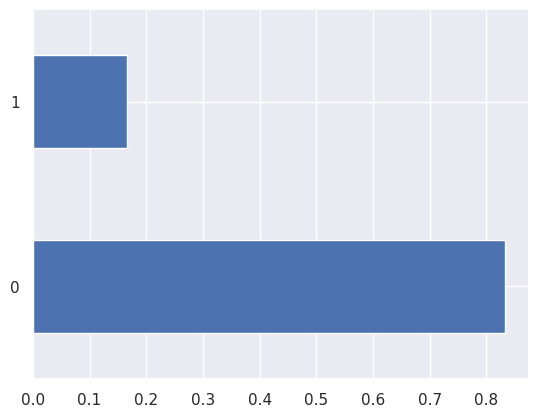

In [ ]:
y.value_counts(normalize=True).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print(confusion_matrix(y_valid, y_pred))

[[299   2]
 [ 50   2]]


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('Precision:', precision_score(y_valid, y_pred))
print('Recall:', recall_score(y_valid, y_pred))
print('F1 score:', f1_score(y_valid, y_pred))

Precision: 0.5
Recall: 0.038461538461538464
F1 score: 0.07142857142857144
